In [63]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from matplotlib import pyplot as plt, colors

***ЗАДАНИЕ 1***

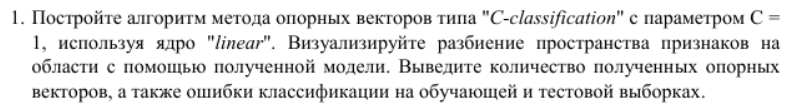

,X1,X2,Color
1,0.148747,0.131288,red
2,-0.048815,0.036423,red
3,-0.062391,-0.234860,red
4,0.354839,-0.177403,red
5,-0.145617,0.081265,red


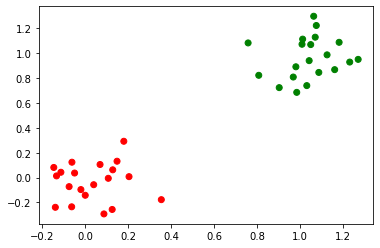

In [2]:
data = pd.read_csv('svmdata1.txt', sep='\t')
test_data = pd.read_csv('svmdata1test.txt', sep='\t')
plt.scatter(data.X1, data.X2, c=data.Color)
data.head()

In [3]:
X, y = data.drop('Color', axis=1), data.Color

In [14]:
clf = LinearSVC()
clf.fit(X, y)
clf.coef_

array([[-1.14510319, -1.06346063]])

Text(0.5, 1.0, 'Train dataset')

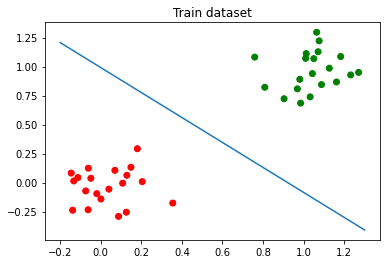

In [42]:
xs = np.arange(-0.2, 1.5, 0.3)
ys = -(xs * clf.coef_[0, 0] + clf.intercept_) / clf.coef_[0, 1]
plt.plot(xs, ys)
plt.scatter(data.X1, data.X2, c=data.Color)
plt.title("Train dataset")

1.0

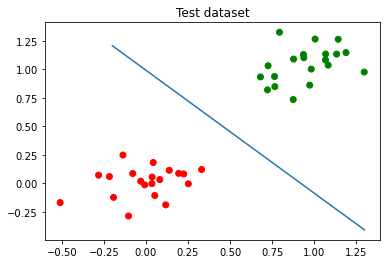

In [44]:
X_test, y_test = test_data.drop('Color', axis=1), test_data.Color
plt.scatter(test_data.X1, test_data.X2, c=test_data.Color)
plt.plot(xs, ys)
plt.title("Test dataset")
clf.score(X_test, y_test)

***Задание 2***

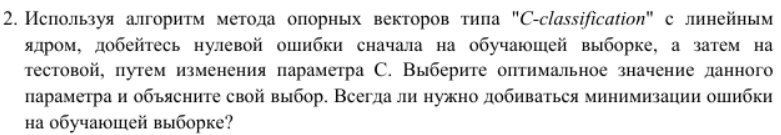

,X1,X2,Colors
1,0.076976,-0.393209,red
2,-0.553392,0.212363,red
3,0.535483,-0.053169,red
4,-0.001037,-0.000010,red
5,-0.121083,0.464640,red


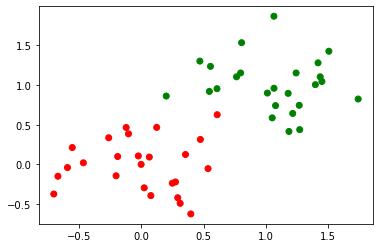

In [47]:
data = pd.read_csv('svmdata2.txt', sep='\t')
test_data = pd.read_csv('svmdata2test.txt', sep='\t')
plt.scatter(data.X1, data.X2, c=data.Colors)
data.head()

In [56]:
X, y = data.drop('Colors', axis=1), data.Colors
for c in np.arange(1, 50, 0.1):
    clf = LinearSVC(C=c, dual=False)
    clf.fit(X, y)
    print(c, clf.score(X, y))

1.0 0.98
1.1 0.98
1.2000000000000002 0.98
1.3000000000000003 0.98
1.4000000000000004 0.98
1.5000000000000004 0.98
1.6000000000000005 0.98
1.7000000000000006 0.98
1.8000000000000007 0.98
1.9000000000000008 0.98
2.000000000000001 0.98
2.100000000000001 0.98
2.200000000000001 0.98
2.300000000000001 0.98
2.4000000000000012 0.98
2.5000000000000013 0.98
2.6000000000000014 0.98
2.7000000000000015 0.98
2.8000000000000016 0.98
2.9000000000000017 0.98
3.0000000000000018 0.98
3.100000000000002 0.98
3.200000000000002 0.98
3.300000000000002 0.98
3.400000000000002 0.98
3.500000000000002 0.98
3.6000000000000023 0.98
3.7000000000000024 0.98
3.8000000000000025 0.98
3.9000000000000026 0.98
4.000000000000003 0.98
4.100000000000003 0.98
4.200000000000003 0.98
4.3000000000000025 0.98
4.400000000000003 0.98
4.5000000000000036 0.98
4.600000000000003 0.98
4.700000000000003 0.98
4.800000000000003 0.98
4.900000000000004 0.98
5.0000000000000036 0.98
5.100000000000003 0.98
5.200000000000004 0.98
5.300000000000004

36.20000000000003 0.98
36.30000000000003 0.98
36.400000000000034 0.98
36.50000000000003 0.98
36.60000000000003 0.98
36.70000000000003 0.98
36.80000000000003 0.98
36.900000000000034 0.98
37.00000000000003 0.98
37.10000000000003 0.98
37.20000000000003 0.98
37.30000000000003 0.98
37.400000000000034 0.98
37.500000000000036 0.98
37.60000000000003 0.98
37.70000000000003 0.98
37.80000000000003 0.98
37.900000000000034 0.98
38.000000000000036 0.98
38.10000000000003 0.98
38.20000000000003 0.98
38.30000000000003 0.98
38.400000000000034 0.98
38.500000000000036 0.98
38.60000000000004 0.98
38.70000000000003 0.98
38.80000000000003 0.98
38.900000000000034 0.98
39.000000000000036 0.98
39.10000000000004 0.98
39.20000000000003 0.98
39.30000000000003 0.98
39.400000000000034 0.98
39.500000000000036 0.98
39.60000000000004 0.98
39.70000000000003 0.98
39.80000000000003 0.98
39.900000000000034 0.98
40.000000000000036 0.98
40.10000000000004 0.98
40.20000000000003 0.98
40.30000000000003 0.98
40.400000000000034 0

(array([[-1.10493074, -1.31066493]]), array([1.24304517]))

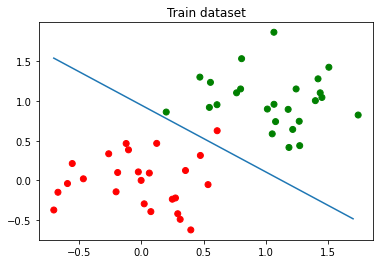

In [65]:
clf = LinearSVC()
clf.fit(X, y)
xs = np.arange(X.X1.min(), X.X1.max(), 0.1)
ys = -(xs * clf.coef_[0, 0] + clf.intercept_) / clf.coef_[0, 1]
plt.plot(xs, ys)
plt.scatter(data.X1, data.X2, c=data.Colors)
plt.title("Train dataset")
clf.coef_, clf.intercept_

1.0

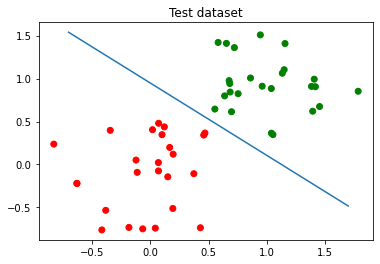

In [64]:
X_test, y_test = test_data.drop('Colors', axis=1), test_data.Colors
plt.scatter(test_data.X1, test_data.X2, c=test_data.Colors)
plt.plot(xs, ys)
plt.title("Test dataset")
clf.score(X_test, y_test)

***ЗАДАНИЕ 3***

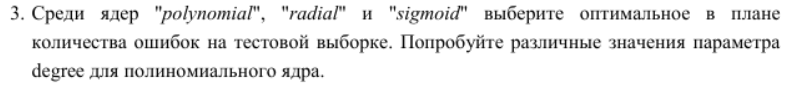

,X1,X2,Colors
1,-0.335467,0.102236,red
2,0.671854,0.787542,green
3,1.916900,-0.909649,green
4,-0.582359,0.632418,red
5,-0.329232,0.927994,red


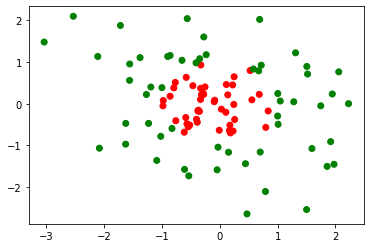

In [68]:
data = pd.read_csv('svmdata3.txt', sep='\t')
#test_data = pd.read_csv('svmdata3test.txt', sep='\t')
plt.scatter(data.X1, data.X2, c=data.Colors)
data.head()

In [159]:
X, y = data.drop('Colors', axis=1), data.Colors
clf = SVC(degree=2, C=65)
params = {'kernel': ('rbf', 'poly', 'sigmoid')}
gs = GridSearchCV(clf, param_grid=params, cv=5)
gs.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(C=65, degree=2),
             param_grid={'kernel': ('rbf', 'poly', 'sigmoid')})

In [160]:
gs.cv_results_['mean_test_score']

array([0.94, 0.96, 0.44])

Примечательно, что при четных значениях степени полинома имеем лучшие результаты, чем при нечетных, поскольку лучшим преобразованием пространства является его вытягивание в "колокол" с центром в красной области. Именно такое вытягивание позволяют сделать полиномы четных степеней. Увеличение параметра C дает лучший результат (быстрее всего улучшается параболическое преобразование), *но может привести к переобучению (C - степень наказания за отдельные ошибки, если за них наказывать сильнее, то модель будет на них больше концентрироваться)*

**Скорее всего, обученная модель с параметром C=65 переобучилась**

***ЗАДАНИЕ 4***

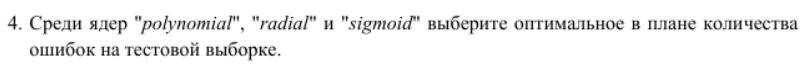

,X1,X2,Colors
1,11.503087,-0.872017,green
2,6.952235,-0.368240,red
3,9.157642,1.058048,green
4,3.921632,1.703045,green
5,4.019569,0.706163,green


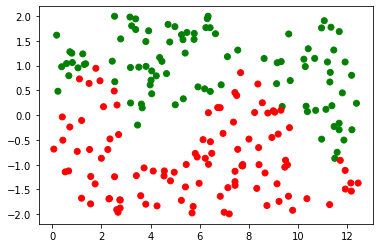

In [37]:
data = pd.read_csv('svmdata4.txt', sep='\t')
test_data = pd.read_csv('svmdata4test.txt', sep='\t')
plt.scatter(data.X1, data.X2, c=data.Colors)
data.head()

In [38]:
X, y = data.drop('Colors', axis=1), data.Colors
clf = SVC(degree=2, C=1500)
params = {'kernel': ('rbf', 'poly', 'sigmoid')}
gs = GridSearchCV(clf, param_grid=params, cv=5)
gs.fit(X, y)
gs.cv_results_['mean_test_score']

array([0.97 , 0.835, 0.555])

In [39]:
X_test, y_test = test_data.drop('Colors', axis=1), test_data.Colors
gs.best_estimator_.score(X_test, y_test)

0.975

Лучшее - радиальное ядро 

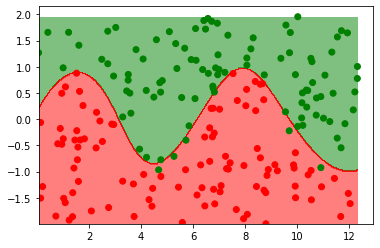

In [41]:
def plot_contour(clf, data):
    h = 0.02
    xx, yy = np.meshgrid(np.arange(data.X1.min(), data.X1.max(), h),
                         np.arange(data.X2.min(), data.X2.max(), h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array([1 if i == 'red' else 0 for i in Z])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=colors.ListedColormap(['g', 'r']))

    plt.scatter(data.X1, data.X2, c=data.Colors)
    
plot_contour(gs.best_estimator_, test_data)

***ЗАДАНИЕ 5***

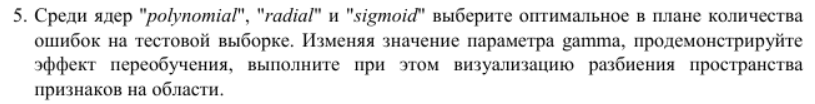

,X1,X2,Colors
1,-0.481785,0.547612,red
2,-0.284473,0.835821,red
3,-0.324098,0.976975,red
4,-0.078877,0.363042,red
5,-0.021214,0.804514,red


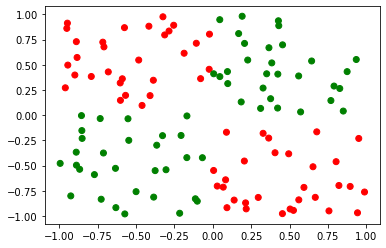

In [42]:
data = pd.read_csv('svmdata5.txt', sep='\t')
test_data = pd.read_csv('svmdata5test.txt', sep='\t')
plt.scatter(data.X1, data.X2, c=data.Colors)
data.head()

poly 1 0.95


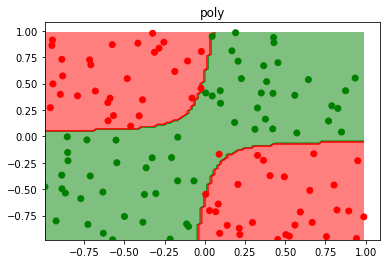

poly 4 0.9666666666666667


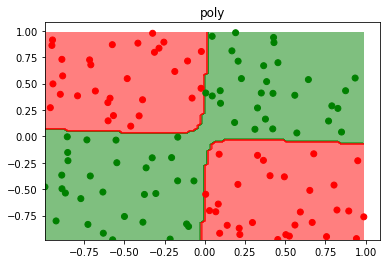

poly 7 0.9333333333333333


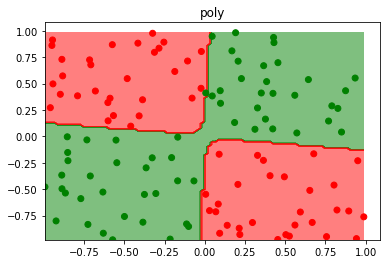

poly 10 0.925


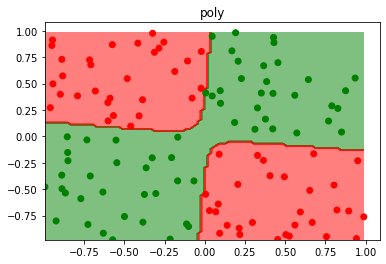

poly 13 0.925


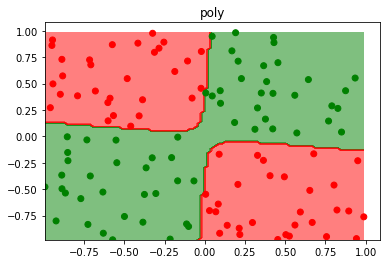

poly 16 0.9583333333333334


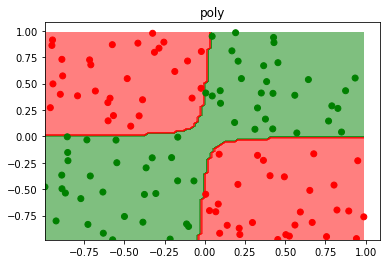

poly 19 0.9583333333333334


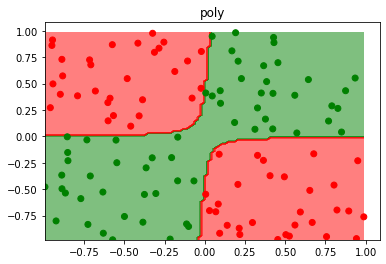

poly 22 0.9666666666666667


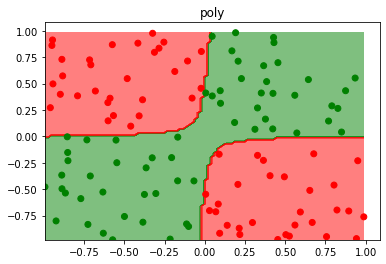

poly 25 0.9666666666666667


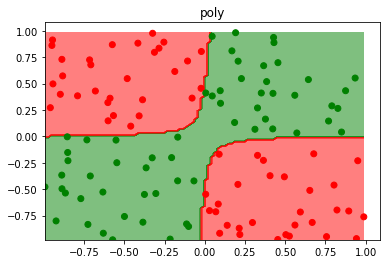

poly 28 0.9666666666666667


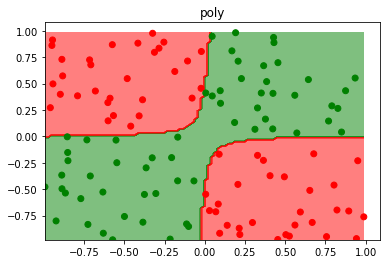

radial 1 0.525


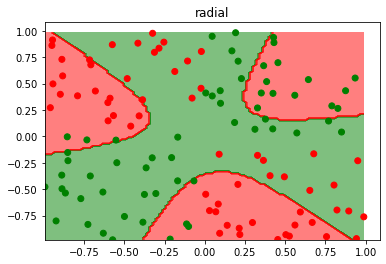

radial 4 0.525


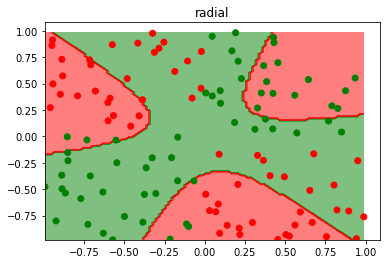

radial 7 0.525


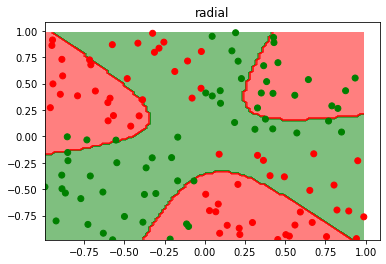

radial 10 0.5166666666666667


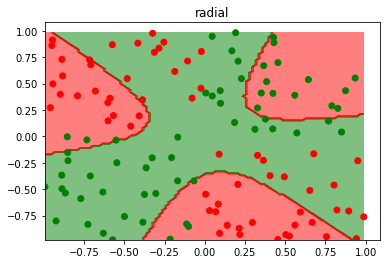

radial 13 0.5166666666666667


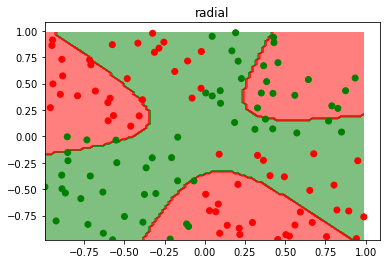

radial 16 0.5083333333333333


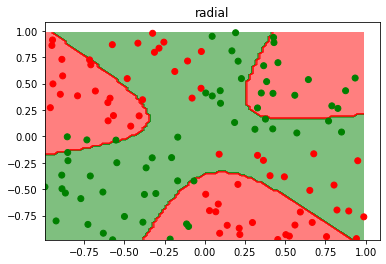

radial 19 0.5083333333333333


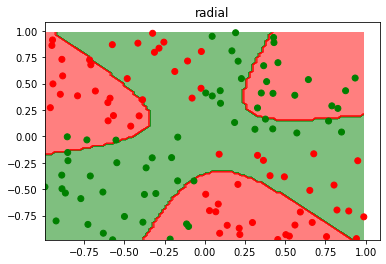

radial 22 0.5083333333333333


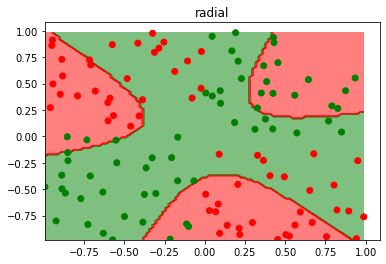

radial 25 0.5333333333333333


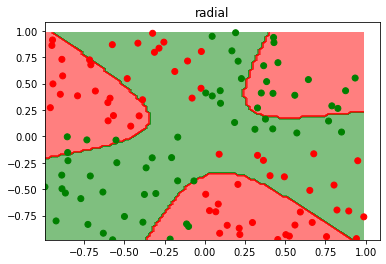

radial 28 0.5166666666666667


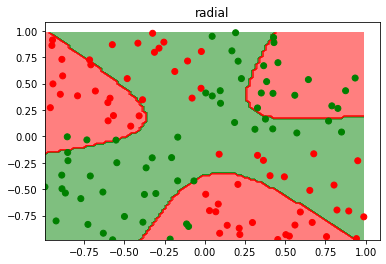

sigmoid 1 0.525


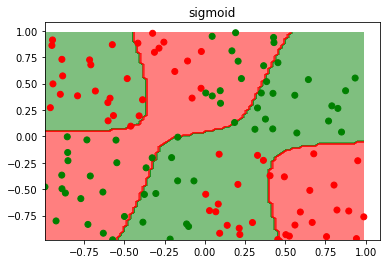

sigmoid 4 0.5083333333333333


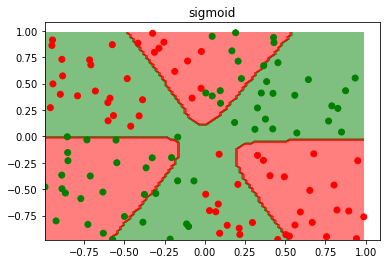

sigmoid 7 0.49166666666666664


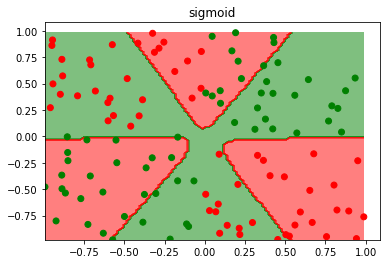

sigmoid 10 0.49166666666666664


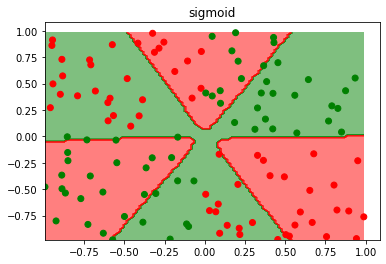

sigmoid 13 0.5


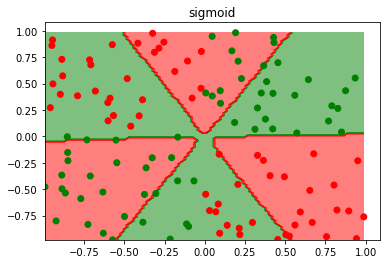

sigmoid 16 0.5


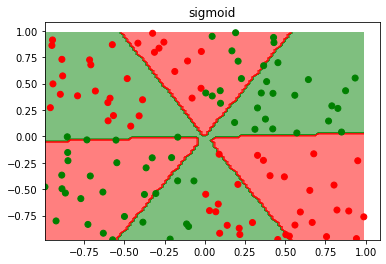

sigmoid 19 0.5


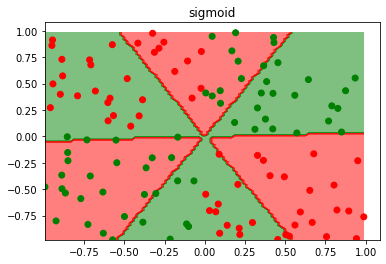

sigmoid 22 0.5083333333333333


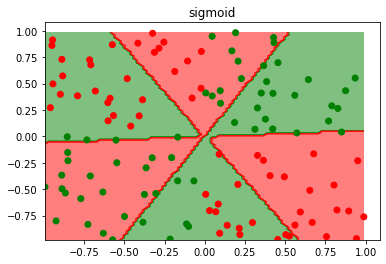

sigmoid 25 0.5083333333333333


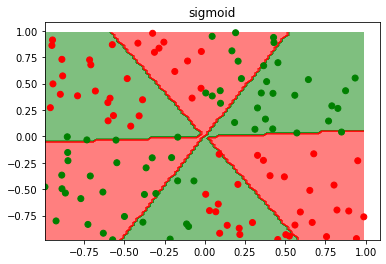

sigmoid 28 0.5083333333333333


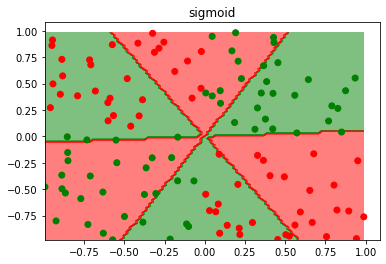

In [53]:
c = 15
models = {'poly': SVC(kernel='poly', C = c, degree=2), 'radial': SVC(kernel='poly', C = c),
          'sigmoid': SVC(kernel='sigmoid', C = c)}
X, y = data.drop('Colors', axis=1), data.Colors
X_test, y_test = test_data.drop('Colors', axis=1), test_data.Colors
for name, model in models.items():
    maxval = 30 if name == 'poly' else 30
    for gamma in range(1, 31, 3):
        model.set_params(gamma=gamma)
        model.fit(X, y)
        print(name, gamma, model.score(X_test, y_test))
        plot_contour(model, data)
        plt.title(name)
        plt.show()

sigmoid 1 0.95


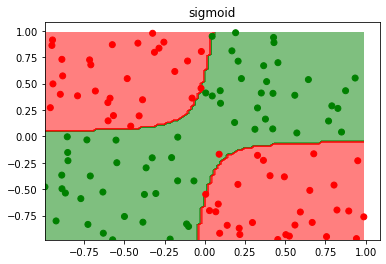

sigmoid 4 0.9666666666666667


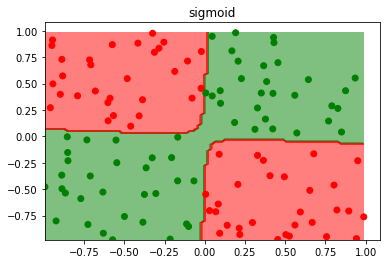

sigmoid 7 0.9333333333333333


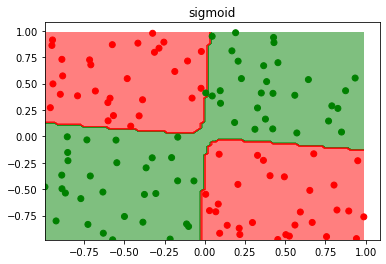

sigmoid 10 0.925


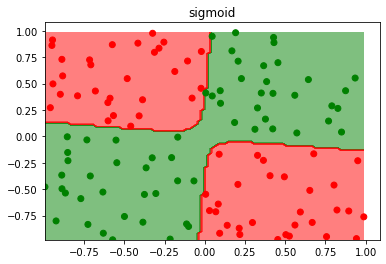

sigmoid 13 0.925


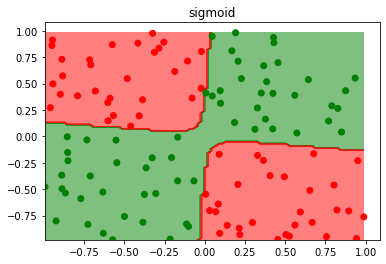

sigmoid 16 0.9583333333333334


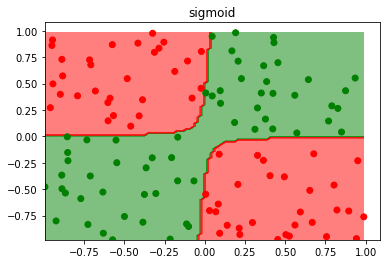

sigmoid 19 0.9583333333333334


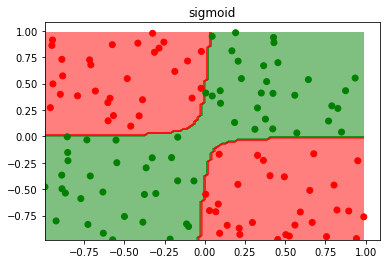

sigmoid 22 0.9666666666666667


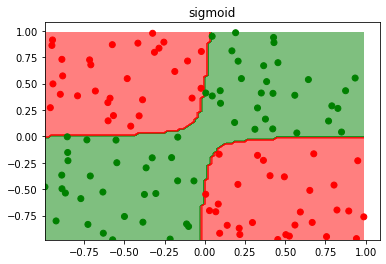

sigmoid 25 0.9666666666666667


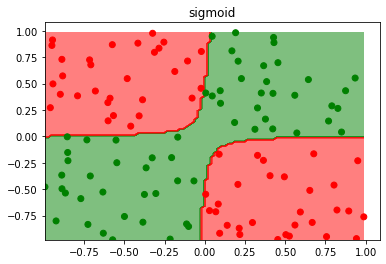

sigmoid 28 0.9666666666666667


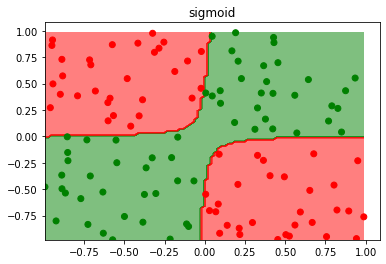

sigmoid 31 0.9666666666666667


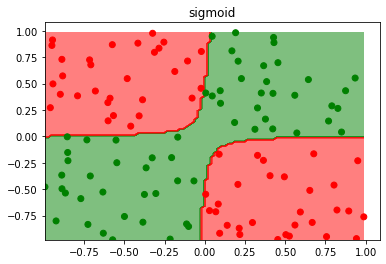

sigmoid 34 0.9666666666666667


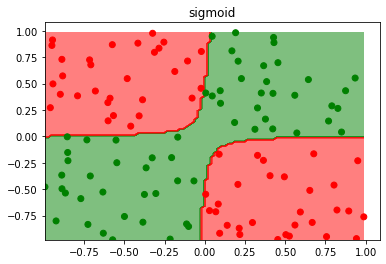

sigmoid 37 0.9666666666666667


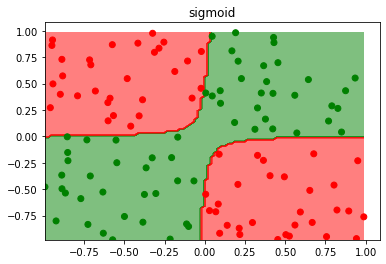

sigmoid 40 0.9666666666666667


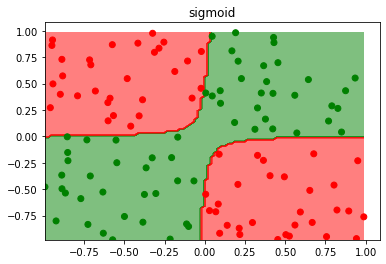

sigmoid 43 0.9666666666666667


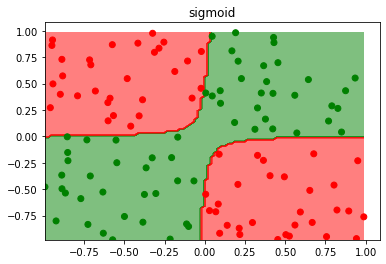

sigmoid 46 0.9666666666666667


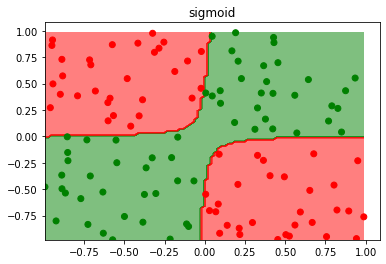

sigmoid 49 0.9666666666666667


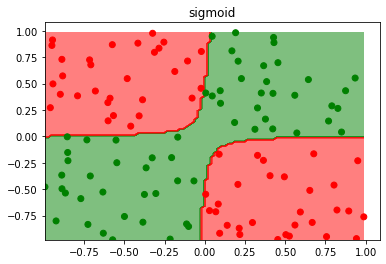

sigmoid 52 0.9666666666666667


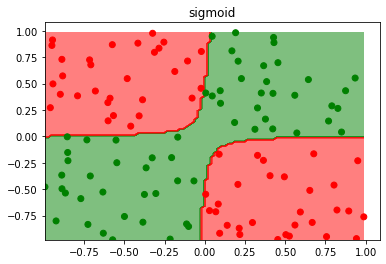

sigmoid 55 0.9666666666666667


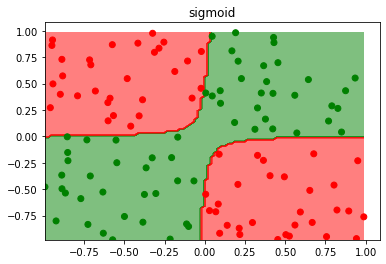

sigmoid 58 0.9666666666666667


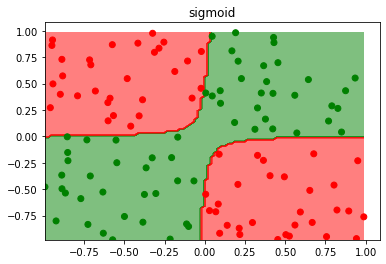

sigmoid 61 0.9666666666666667


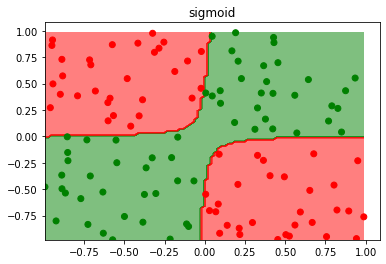

sigmoid 64 0.9666666666666667


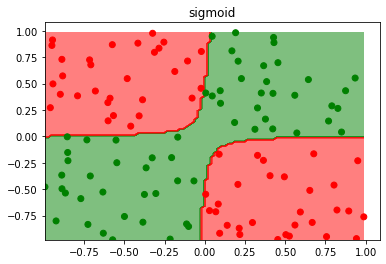

sigmoid 67 0.9666666666666667


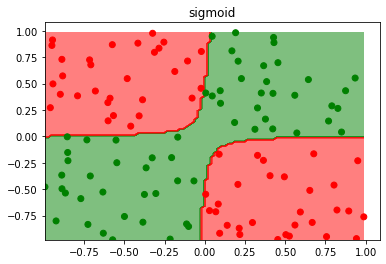

sigmoid 70 0.9666666666666667


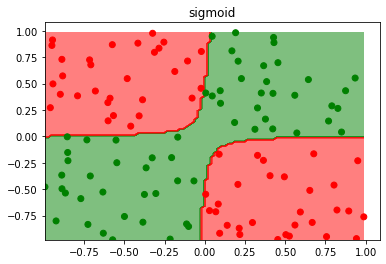

sigmoid 73 0.9666666666666667


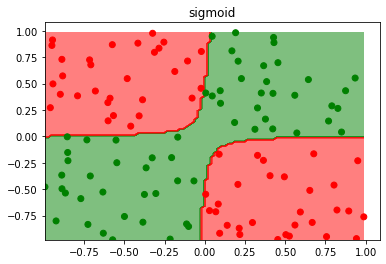

sigmoid 76 0.9666666666666667


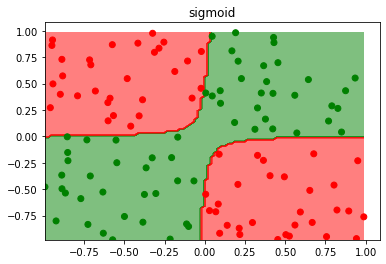

sigmoid 79 0.9666666666666667


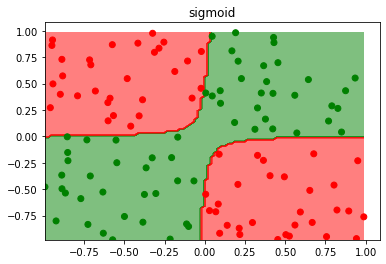

sigmoid 82 0.9666666666666667


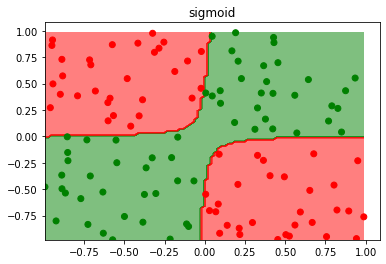

sigmoid 85 0.9666666666666667


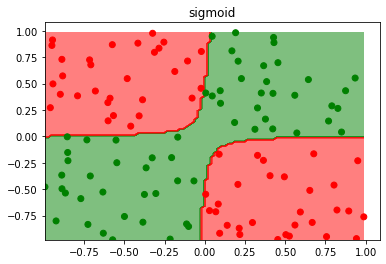

sigmoid 88 0.9666666666666667


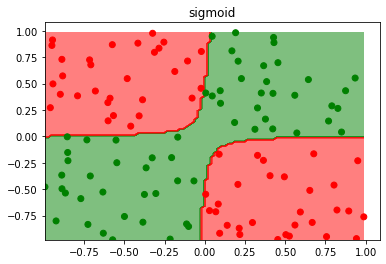

sigmoid 91 0.9666666666666667


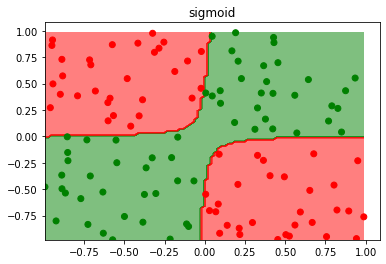

sigmoid 94 0.9666666666666667


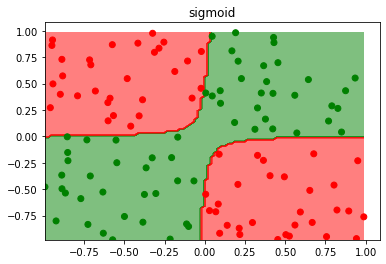

sigmoid 97 0.9666666666666667


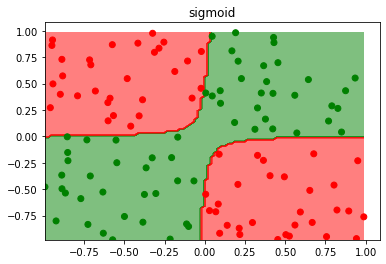

In [54]:
model = SVC(kernel='poly', C = 15, degree=2)
for gamma in range(1, 100, 3):
    model.set_params(gamma=gamma)
    model.fit(X, y)
    print(name, gamma, model.score(X_test, y_test))
    plot_contour(model, data)
    plt.title(name)
    plt.show()

***ЗАДАНИЕ 6***

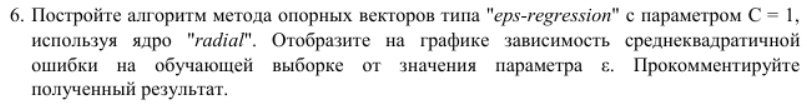

,X,Y
1,0.00,-0.035662
2,0.05,0.059784
3,0.10,-0.111344
4,0.15,0.099728
5,0.20,0.297808


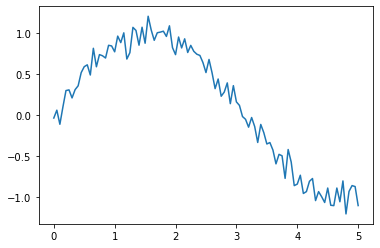

In [61]:
data = pd.read_csv('svmdata6.txt', sep='\t')
#test_data = pd.read_csv('svmdata6test.txt', sep='\t')
plt.plot(data.X, data.Y)
data.head()

In [100]:
X = data.drop('Y', axis=1)
y = data.Y
X, X_test, y, y_test = train_test_split(X, y, train_size=0.8)

def score(model, X, y):
    dif = model.predict(X) - y
    return np.sqrt(np.mean(dif * dif))

In [105]:
results = []
for eps in np.arange(0, 1.5, 0.05):
    model = SVR(epsilon=eps)
    model.fit(X, y)
    results.append(score(model, X_test, y_test))
min(results)

0.11680067908913032

Text(0, 0.5, 'mean standard deviation')

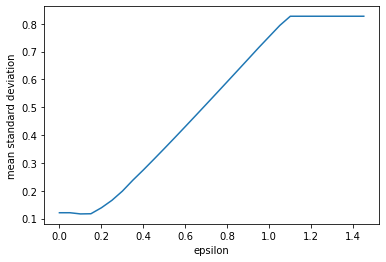

In [106]:
plt.plot(np.arange(0, 1.5, 0.05), results)
plt.xlabel('epsilon')
plt.ylabel('mean standard deviation')

Штрафуем модель за те примеры, в которых она ошибается больше, чем на epsilon
Если сделать слишком большой порог толерантности, то она ничему не научится.

Правда, наверное, должно было быть более выраженное падение ошибки где-то в районе 0.18, т.к. наша выборка имеет отклонения, к которым нужно быть терпимым до какого-то момента